### State Schema with DataClasses
* When we define a LangGraph StateGraph, we use a state schema
* The state schema represents the structure and types of data that our graph will use.
* All nodes expected to communicate with that schema
* LangGraph offers flexibility in how you define your state schema, accommodating various Python types and validation approaches.

* We can use TypedDict class from Python's typing module.It allows you to specify keys and their corresponding value type(s), But note that these are type hints. They can be used by static type checkers (like mypy) or IDEs to catch potential type-related errors before the code is run.__But, they are not enforced at runtime__.



In [ ]:
from typing_extensions import TypedDict
from typing import Literal 
# state is input for the entire graph 

class TypedDictState(TypedDict):  # The keys types not enforced during runtime because of the TypedDict
    name:str                                 # key and value type 
    game:Literal["cricket","badminton"]      # key and value type 


In [42]:
# Definitions of Nodes
def play_game(state:TypedDictState):
    print("---Play Game node has been called--")
    return {"name":state['name'] + " wanted to play "}

def cricket(state:TypedDictState):
    print("---Cricket node has been called--")
    return {"game":"cricket"}

def badminton(state:TypedDictState):
    print("---Badminton node has been called--")
    return {"game":"badminton"}

# Function for "decide_play"
import random
def decide_play(state:TypedDictState)->Literal["cricket","badminton"]:
    # Here, lets just do a 50 / 50 split between nodes 2, 3 

    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"


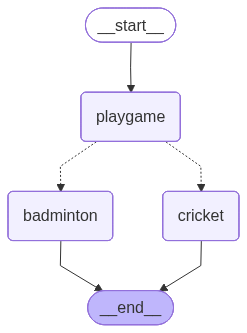

In [43]:

import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

# Create Builder Graph 
builder=StateGraph(TypedDictState)

### Adding the nodes 
builder.add_node("playgame",playgame)  # "node name" and function name
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

### Add the edges
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

### Building the graph 
graph=builder.compile()

### View the graph 
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
### Calling the graph 
graph.invoke({"name":"Venkat"})

---Play Game node has been called--
---Cricket node has been called--


{'name': 'Venkat want to paly ', 'game': 'cricket'}

In [ ]:
graph.invoke({"name":"123"})  # the type of the value is not enforced at runtime as mentioned in the notes.

---Play Game node has been called--
---Badminton node has been called--


{'name': '123 want to paly ', 'game': 'badminton'}

### DataClasses 
##### Python's dataclasses provide another way to define structured data. Dataclasses offer a concise syntax for creating classes that are primarily used to store data

In [76]:
### Dataclasses 
from dataclasses import dataclass 

@dataclass
class DataClassState:                        # The keys types not enforced during runtime because of the TypedDict
    name:str                                 # key and value type 
    game:Literal["cricket","badminton"]

# Definitions of Nodes
def play_game(state:DataClassState):
    print("---Play Game node has been called--")
    return {"name":state.name + " wanted to play "}

def cricket(state:DataClassState):
    print("---Cricket node has been called--")
    return {"name":state.name + " cricket","game":"cricket"}

def badminton(state:DataClassState):
    print("---Cricket node has been called--")
    return {"name":state.name + " badminton","game":"badminton"}

# Function for "decide_play"
import random
def decide_play(state:DataClassState)->Literal["cricket","badminton"]:
    # Here, lets just do a 50 / 50 split between nodes 2, 3 

    if random.random() < 0.5:
        return "cricket"
    else:
        return "badminton"


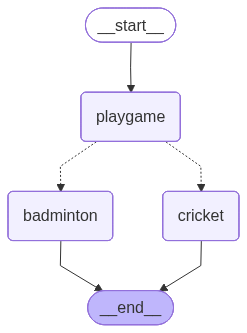

In [77]:
import random
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

# Create Builder Graph 
builder=StateGraph(DataClassState)

### Adding the nodes 
builder.add_node("playgame",playgame)  # "node name" and function name
builder.add_node("cricket",cricket)
builder.add_node("badminton",badminton)

### Add the edges
builder.add_edge(START,"playgame")
builder.add_conditional_edges("playgame",decide_play)
builder.add_edge("cricket",END)
builder.add_edge("badminton",END)

### Building the graph 
graph=builder.compile()

### View the graph 
display(Image(graph.get_graph().draw_mermaid_png()))

In [81]:
### Calling the graph using direct values instead of dictionary 
graph.invoke(DataClassState(name="Venkat",game="cricket"))

---Play Game node has been called--
---Cricket node has been called--


{'name': 'Venkat want to paly  badminton', 'game': 'badminton'}

In [ ]:
# passing integer value to name
graph.invoke(DataClassState(name=123,game="cricket"))